#Trabalho prático # 2
##Introdução à Computação Numérica

###Tópico: Diferenciação numérica e Polinômios de Taylor 

---

Nome: Riquelme Freitas Gomes

DRE: 120032785

---

**Instruções:** 

**Preencha o notebook** com seus dados, seus códigos e **rode todos os códigos** 

**Inclua  um relatório, na parte final do notebook,** com suas conclusões, respostas, observações e comentários relacionados com os tópicos e questões abordadas nas tarefas.  

**A elaboração dos códigos pode ser realizada em duplas, mas o resto do trabalho é individual.**

*Se você fez o seu trabalho em dupla inclua essa informação no relatório. Além disso, se você  também recebeu ajuda de um(a) colega/amigo(a) ou consultou/usou informações da internet ou outras fontes, coloque referências à elas no seu relatório.*


**Entrega do trabalho:**

*Data de entrega: 21/outubro/2022* 

---


## Tarefa #1: Aproximando derivadas.

As seguintes fórmulas fornecem aproximações por diferenças finitas das derivadas de primeira, segunda e terceira ordens com erros de ordem quadrática. 

i)  
$$f'(x) =  \frac{-f(x+2\Delta x) + 4f(x+\Delta x) - 3 f(x)}{2\Delta x} + \mathcal{O}(\Delta x)^2$$
$$f'(x) = \frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x}+\mathcal{O}(\Delta x)^2$$
ii)
$$f''(x) = \frac{-f(x+3\Delta x)+4f(x+2\Delta x)-5f(x+\Delta x)+2f(x)}{(\Delta x)^2}+\mathcal{O}(\Delta x)^2$$
$$f''(x) = \frac{f(x+\Delta x)-2f(x)+f(x-\Delta x)}{(\Delta x)^2}+\mathcal{O}(\Delta x)^2$$
iii) 
$$f'''(x) = \frac{-3f(x+4\Delta x)+14f(x+3\Delta x)-24f(x+2\Delta x)+18f(x+\Delta x)-5f(x)}{2(\Delta x)^3}+\mathcal{O}(\Delta x)^2$$ 
$$f'''(x) = \frac{f(x+2\Delta x)-2f(x+\Delta x)+2f(x-\Delta x)-f(x-2\Delta x)}{2(\Delta x)^3}+\mathcal{O}(\Delta x)^2$$ 

a) Prove duas das fórmulas acima. Faça o desenvolvimento no seu caderno.

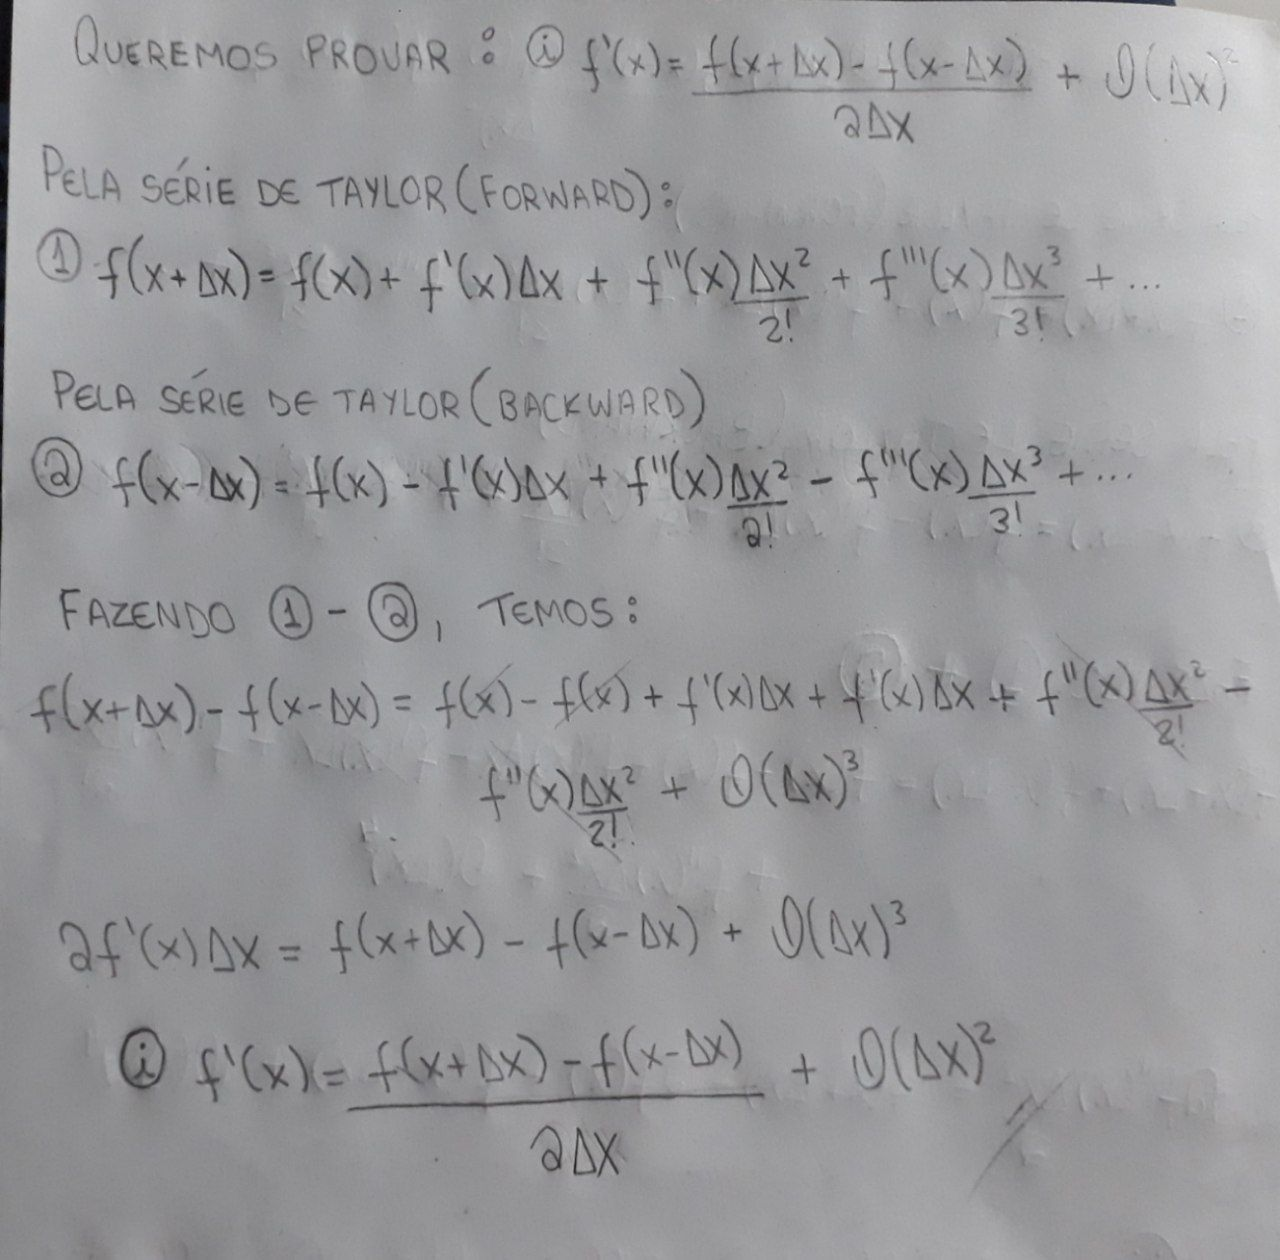

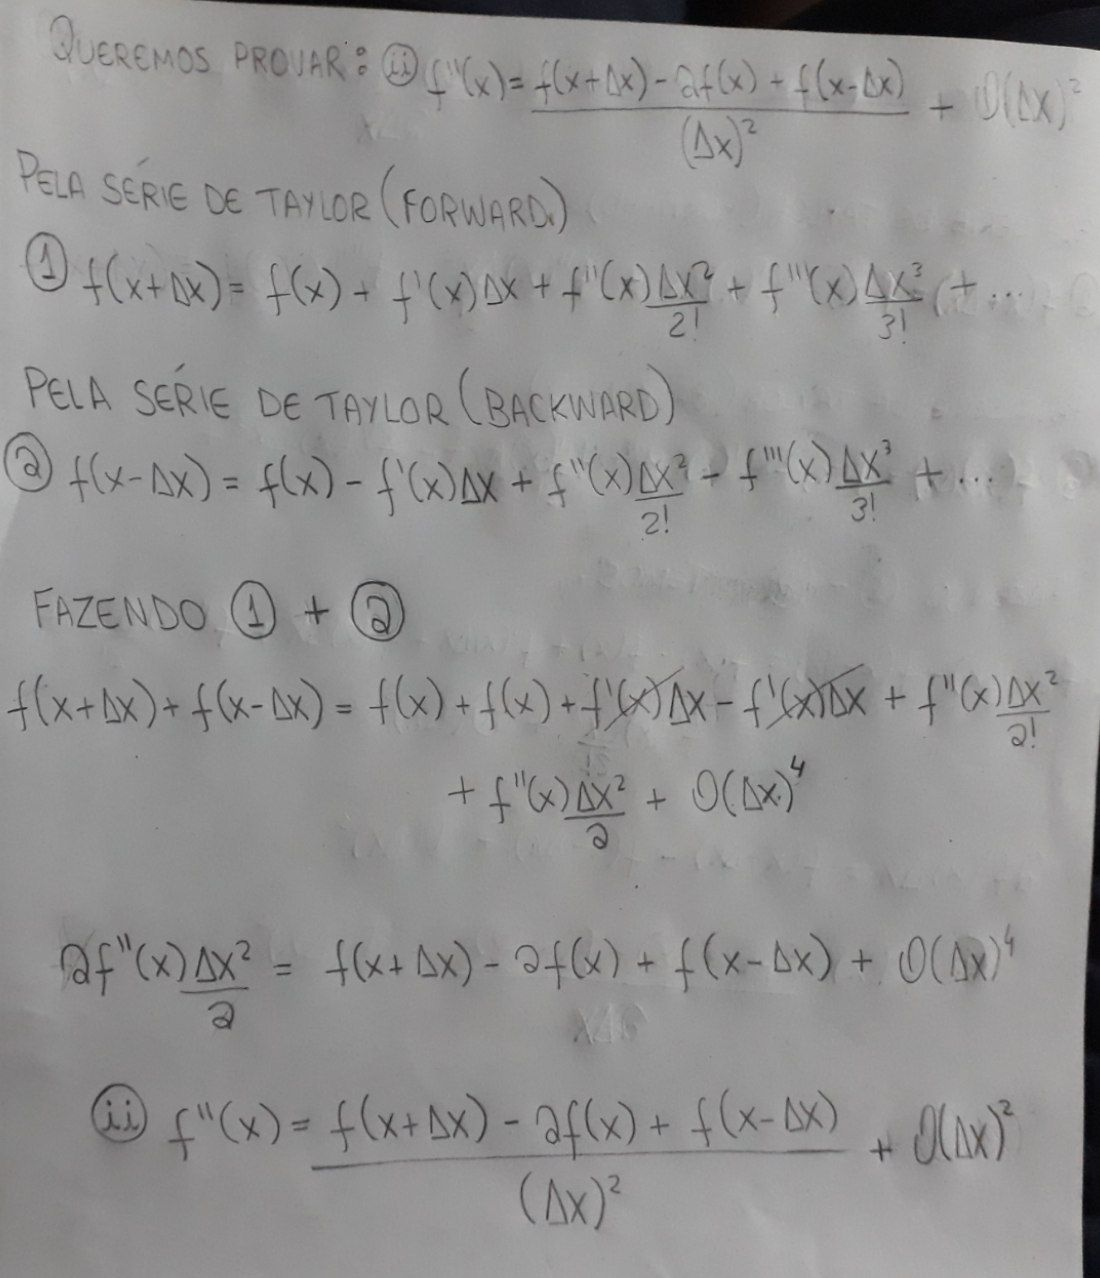

##Tarefa #2

a) Implemente funções em Python para cada uma das aproximações apresentadas na Tarefa #1. Usando como parâmetros de entrada a função  𝑓, o ponto 𝑥 e o incremento  Δ𝑥 .

b) Implemente funções em Python para cada uma das aproximações apresentadas  na Tarefa #1. Use como parâmetros de entrada uma lista com os valores  $𝑓_𝑗=𝑓(𝑥+𝑗\Delta x)$  que serão utilizados no cálculo, e o incremento  Δ𝑥.

c) Teste a acurácia dessas fórmulas aproximando as derivadas de  $𝑓(𝑥)=\mathrm{sen}(0.5\sqrt{x})/x$  em alguns pontos do intervalo  (0,1)  e diferentes valores de  Δ𝑥 . Determine os erros absolutos dessas aproximações. Explique os resultados observados.

In [1]:
# a) Aproximações

# Derivada de PRIMEIRA ordem

# Avançada
def d1_av(f, x, deltax):  
  return (-1*f(x + 2*deltax) + 4*f(x + deltax) -3*f(x)) / (2*deltax)

# Centrada
def d1_centrada(f, x, deltax): 
  return (f(x + deltax) - f(x - deltax)) / (2*deltax)

# Derivada de SEGUNDA ordem

# Avançada
def d2_av(f, x, deltax):
  return (-1*f(x + 3*deltax) + 4*f(x + 2*deltax) - 5*f(x + deltax) + 2*f(x)) / (deltax**2)

# Centrada
def d2_centrada(f, x, deltax):
  return (f(x + deltax) - 2*f(x) + f(x - deltax)) / (deltax**2)

# Derivada de TERCEIRA ordem

# Avançada
def d3_av(f, x, deltax):
  return -3*f(x + 4*deltax) + 14*f(x + 3*deltax) - 24*f(x + 2*deltax) + 18*f(x + deltax) - 5*f(x) / (2*(deltax**3))

# Centrada
def d3_centrada(f, x, deltax):
  return f(x + 2*deltax) - 2*f(x + deltax) + 2*f(x - deltax) - 1*f(x - 2*deltax) / (2*(deltax**3))

In [2]:
# b) lista[j] = f(x + j*deltax)

# Derivada de primeira ordem
def d1av_lista(lista, deltax):
  return (-1*lista[2] + 4*lista[1] -3*lista[0]) / (2*deltax)

def d1c_lista(lista, deltax):
  return (lista[1] - lista[-1]) / (2*deltax)

# Derivada de segunda ordem
def d2av_lista(lista, deltax):
  return (-1*lista[3] + 4*lista[2] - 5*lista[1] + 2*lista[0]) / (deltax**2)

def d2c_lista(lista, deltax):
  return (lista[1] - 2*lista[0] + lista[-1]) / (deltax**2)

# Derivada de terceira ordem
def d3av_lista(lista, deltax):
  return -3*lista[4] + 14*lista[3] - 24*lista[2] + 18*lista[1] - 5*lista[0] / (2*(deltax**3))

def d3c_lista(lista, deltax):
  return lista[2] - 2*lista[1] + 2*lista[-1] - 1*lista[-2] / (2*(deltax**3))

In [3]:
from sympy import *
import random

# c) Aproximação para f(x) = sen(0.5√x)/x
func = lambda x: sin(0.5*sqrt(x)) / x

def inserir_lista(lista, pontox, deltax, *args):
  for i in args:
    if i < 0:
      lista.append(func(pontox + i*deltax))
    else:
      lista.insert(i, func(pontox + i*deltax))

print("Aproximação para derivada de PRIMEIRA ordem.")
for k in range(5):
  lista1 = []
  pontox = random.random()
  deltax = random.random()

  inserir_lista(lista1, pontox, deltax, 1, -1)
  aprox_d1c = d1_centrada(func, pontox, deltax)
  aprox_d1c_lista = d1c_lista(lista1, deltax)

  print(f"Ponto x: {pontox}          Δ𝑥: {deltax}         Erro absoluto: {abs(aprox_d1c - aprox_d1c_lista)}")


print("\nAproximação para derivada de SEGUNDA ordem.")
for k in range(5):
  lista2 = []
  pontox = random.random()
  deltax = random.random()

  inserir_lista(lista2, pontox, deltax, 0, 1, -1)
  aprox_d2c = d2_centrada(func, pontox, deltax)
  aprox_d2c_lista = d2c_lista(lista2, deltax)

  print(f"Ponto x: {pontox}          Δ𝑥: {deltax}         Erro absoluto: {abs(aprox_d2c - aprox_d2c_lista)}")


print("\nAproximação para derivada de TERCEIRA ordem.")
for k in range(5):
  lista3 = []
  pontox = random.random()
  deltax = random.random()

  inserir_lista(lista3, pontox, deltax, 1, 2, -2, -1)
  aprox_d3c = d3_centrada(func, pontox, deltax)
  aprox_d3c_lista = d3c_lista(lista3, deltax)

  print(f"Ponto x: {pontox}          Δ𝑥: {deltax}         Erro absoluto: {abs(aprox_d3c - aprox_d3c_lista)}")

Aproximação para derivada de PRIMEIRA ordem.
Ponto x: 0.8560688324479484          Δ𝑥: 0.2254882954576557         Erro absoluto: 0.341112024009934
Ponto x: 0.20940229157684576          Δ𝑥: 0.967103792456753         Erro absoluto: 0.381246129034775
Ponto x: 0.00784569832730464          Δ𝑥: 0.5623678868933404         Erro absoluto: 0.838797458266380
Ponto x: 0.49772622800384525          Δ𝑥: 0.6398807720526001         Erro absoluto: 1.09932166557943
Ponto x: 0.06729853862119095          Δ𝑥: 0.77473138458585         Erro absoluto: 0.520872284684258

Aproximação para derivada de SEGUNDA ordem.
Ponto x: 0.7480356451179448          Δ𝑥: 0.5047997302302148         Erro absoluto: 0
Ponto x: 0.16791833685547486          Δ𝑥: 0.4859627431302862         Erro absoluto: 0
Ponto x: 0.9140298829495677          Δ𝑥: 0.2107898027364865         Erro absoluto: 0
Ponto x: 0.8934793943254163          Δ𝑥: 0.27673157653728986         Erro absoluto: 0
Ponto x: 0.6970458448375921          Δ𝑥: 0.009380048526776652  

##Tarefa #3: Aplicações

a) A velocidade  $v$ (em  $m/s$) do ar que passa sobre uma superfície plana é medida em vários pontos a uma distância $y$ (em $m$) dessa superfície. Determine a tensão de cisalhamento $\tau$ (em $N/m^2$) na superfície $y = 0$, usando a Lei de Newton da viscosidade $$\tau = \mu\frac{dv}{dy}.$$
Considere a viscosidade dinâmica $\mu = 1.8\cdot 10^{-5}\;N\cdot s/m^2$, e os dados da seguinte tabela.

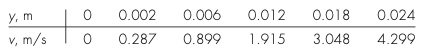


b) Para analisar o comportamento de uma viga uniforme sob o efeito de uma carga distribuída são usadas as seguintes equações:
\begin{align*}
\frac{dy}{dx} &= \theta(x), & \frac{d\theta}{dx} &= \frac{M(x)}{E I}\\ 
\frac{d M}{dx} &= V(x), & \frac{d V}{dx} &= -w(x),
\end{align*}
onde $x$ é a distância ao longo da viga (em $m$), $y$ a  flexão da viga (em $m$), $\theta(x)$ a inclinação (adimensional), $E$ o módulo de Young (em $Pa = N/m^2$), $I$ o momento de inércia (em $m^4$), $M(x)$ o momento fletor (em $N\cdot m$), $V(x)$ a tensão de cisalhamento (em $N$), e $w(x)$ a carga distribuída (em $N/m$).

Use os dados das medições, em vários pontos, da flexão de uma viga uniforme com uma extremidade fixa apresentados na seguinte tabela para determinar aproximadamente a inclinação, o momento fletor e a tensão de cisalhamento nesses pontos da viga. Considere as seguintes características da viga $E = 200\; GPa$ e $I = 0.0003\; m^4$.

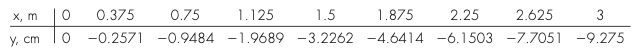

Em qual ponto dessa viga haverá um maior risco de fratura? Justifique.

**Observação**: Sempre que possível use aproximações de segunda ordem e dê preferência às fórmulas centradas.

In [4]:
# a) Aproximação de primeira ordem (avançada) 
# f'(x) = ((-1*f(x + 2*deltax) + 4*f(x + deltax) -3*f(x)) / 2*deltax)

visco_dinamica = 1.8*(10**(-5))
x = 0
deltax = 0.006
v = {0: 0, 0.002: 0.287, 0.006: 0.899, 0.012: 1.915, 0.018: 3.048, 0.024: 4.299}

aprox_d1av = (-1*v[x + 2*deltax] + 4*v[x + deltax] -3*v[x]) / (2*deltax)
tensao_cis = visco_dinamica * aprox_d1av

print(f"A tensão de cisalhamento na superfície y=0 é τ = {tensao_cis} N/m².")

A tensão de cisalhamento na superfície y=0 é τ = 0.0025215000000000003 N/m².


In [5]:
# Aproximação de primeira ordem (centrada) 
# f'(x) = (f(x + deltax) - f(x - deltax)) / (2*deltax)

# Aproximação de segunda ordem (centrada)
# f'(x) = (f(x + deltax) - 2*f(x) + f(x - deltax)) / (deltax**2)

inclinacao = []
momento_fletor = []
E = 200*(10**9)
I = 0.0003
x = [0, 0.375, 0.75, 1.125, 1.5, 1.875, 2.25, 2.625, 3]
y = {0: 0, 0.375: -0.2571, 0.75: -0.9484, 1.125: -1.9689, 1.5: -3.2262, 1.875: -4.6414, 2.25: -6.1503, 2.625: -7.7051, 3: -9.275}
deltax = 0.375

for pontox in range(1, 8):
  aprox_d1c = y[x[pontox] + deltax] - y[x[pontox] - deltax] / (2*deltax)
  inclinacao.append(aprox_d1c) 

  aprox_d2c = ((y[x[pontox] + deltax] - 2*y[x[pontox]] + y[x[pontox] - deltax]) / (deltax**2)) * E * I
  momento_fletor.append(aprox_d2c)
  print(f"Ponto: {x[pontox]}\nInclinação: {aprox_d1c}\nMomento: {aprox_d2c}\n")


Ponto: 0.375
Inclinação: -0.9484
Momento: -185258666.66666666

Ponto: 0.75
Inclinação: -1.6261
Momento: -140458666.6666667

Ponto: 1.125
Inclinação: -1.9616666666666667
Momento: -101034666.66666657

Ponto: 1.5
Inclinação: -2.0162
Momento: -67370666.66666673

Ponto: 1.875
Inclinação: -1.8487
Momento: -39978666.66666652

Ponto: 2.25
Inclinação: -1.5165666666666668
Momento: -19584000.00000021

Ponto: 2.625
Inclinação: -1.0746000000000002
Momento: -6442666.6666668095



# **Relatório**

Nome: Riquelme Freitas Gomes \
DRE: 120032785

\
## **Trabalho prático #2**
Os códigos presentes no trabalho foram elaborados somente por mim.

\
## **Tarefa #1: Aproximando derivadas.**
Para essa tarefa, provei duas das fórmulas de aproximações por diferenças finitas das derivadas de primeira, segunda e terceira ordens com erros de ordem quadrática que foram fornecidas anteriormente. As duas fórmulas escolhidas foram:

\
i)
$$f'(x) = \frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x}+\mathcal{O}(\Delta x)^2$$

ii)
$$f''(x) = \frac{f(x+\Delta x)-2f(x)+f(x-\Delta x)}{(\Delta x)^2}+\mathcal{O}(\Delta x)^2$$

\
i) Aproximação por diferenças finitas das derivada de PRIMEIRA ordem centrada com erros de ordem quadrática. 

ii) Aproximação por diferenças finitas das derivada de SEGUNDA ordem centrada com erros de ordem quadrática.

\
O desenvolvimento foi feito no meu caderno e as imagens foram inseridas como resposta para a tarefa conforme solicitado.

\
## **Tarefa #2:**

### **a)**
Para essa tarefa, implementei funções em Python para cada uma das aproximações apresentadas na Tarefa #1. Cada função tendo como parâmetros de entrada a função  𝑓, o ponto 𝑥 e o incremento  Δ𝑥.

\
### **b)**
Para essa tarefa, implementei funções em Python para cada uma das aproximações apresentadas na Tarefa #1. Cada função tendo como parâmetros de entrada uma lista com os valores  $𝑓_𝑗=𝑓(𝑥+𝑗\Delta x)$  que são utilizados no cálculo, e o incremento  Δ𝑥.

\
### **c)**
Para essa tarefa, testei a acurácia dessas fórmulas, tanto as avançadas quanto as centradas, aproximando a derivada de  $𝑓(𝑥)=\mathrm{sen}(0.5\sqrt{x})/x$  em alguns pontos randômicos do intervalo  (0,1)  e diferentes valores de  Δ𝑥, também aleatórios. Considerando o mesmo ponto e mesmo Δ𝑥 tanto para a fórmula avançada quanto para a centrada, determinei os erros absolutos dessas duas aproximações. Para isso, utilzei as funções feitas na questão 2b que tem como parâmetros de entrada uma lista com os valores  $𝑓_𝑗=𝑓(𝑥+𝑗\Delta x)$ e o incremento Δ𝑥. Porém, antes tive que criar as listas que seriam utilizadas para fazer esse cálculo, assim como os pontos e o Δ𝑥. Esses foram alguns resultados obtidos: 

```
Aproximação para derivada de PRIMEIRA ordem.
Ponto x: 0.7291582573527482          Δ𝑥: 0.7002894472179668         Erro absoluto: 1.81745674089222
Ponto x: 0.2730070705715577          Δ𝑥: 0.7523519485036549         Erro absoluto: 0.581802900265728
Ponto x: 0.32155105053519695         Δ𝑥: 0.16353001342395435        Erro absoluto: 1.66960648866202
Ponto x: 0.7420462815547687          Δ𝑥: 0.15974691522958562        Erro absoluto: 0.414694788341291
Ponto x: 0.1745563209809532          Δ𝑥: 0.9269314799457733         Erro absoluto: 0.403850301019905

Aproximação para derivada de SEGUNDA ordem.
Ponto x: 0.9757942676133415          Δ𝑥: 0.4390357809294215         Erro absoluto: 0
Ponto x: 0.28043272884120096         Δ𝑥: 0.18862118375996273        Erro absoluto: 0
Ponto x: 0.12851517973908388         Δ𝑥: 0.8615221483704709         Erro absoluto: 0
Ponto x: 0.5811507724889496          Δ𝑥: 0.5357755103674736         Erro absoluto: 0
Ponto x: 0.9203201949730114          Δ𝑥: 0.09345558807462595        Erro absoluto: 0

Aproximação para derivada de TERCEIRA ordem.
Ponto x: 0.5834072478728682          Δ𝑥: 0.9336438072050713         Erro absoluto: 0.476257566791044
Ponto x: 0.17772663409414957         Δ𝑥: 0.4323192029645736         Erro absoluto: 0.640538204876511
Ponto x: 0.13932248842160544         Δ𝑥: 0.9970375658858556         Erro absoluto: 0.398586127664148
Ponto x: 0.04441330415836864         Δ𝑥: 0.4240202322482538         Erro absoluto: 0.584668353383988
Ponto x: 0.24152754369629037         Δ𝑥: 0.5401930090524496         Erro absoluto: 0.582136648300485
```

É possível observar que para qualquer ordem da derivada (primeira, segunda ou terceira) as duas aproximações se mostram quase equivalentes, com erros absolutos, na maioria dos casos, próximos de zero. No caso da derivada de segunda ordem o erro absoluto atingiu 0 para todos os pontos e Δ𝑥 testados.

\
## **Tarefa #3: Aplicações.**

### **a)**
Para essa tarefa, determinei a tensão de cisalhamento $\tau$ (em $N/m^2$) na superfície $y = 0$, considerando a viscosidade dinâmica $\mu = 1.8\cdot 10^{-5}\;N\cdot s/m^2$, os dados da tabela e usando a Lei de Newton da viscosidade $\tau = \mu\frac{dv}{dy}.$ Para isso, relacionei os dados da tabela em um dicionário para poder utilizá-los na fórmula de aproximação da derivada de primeira ordem (avançada) e assim calcular a tensão de cisalhamento na superfície $y = 0$. Este foi o resultado obtido pelo meu código: τ = 0.0025215000000000003 N/m².

```
A tensão de cisalhamento na superfície y=0 é τ = 0.0025215000000000003 N/m².
```

\
### **b)**
Para essa tarefa, usei os dados das medições, em vários pontos, da flexão de uma viga uniforme com uma extremidade fixa apresentados na tabela para determinar aproximadamente a inclinação, o momento fletor e a tensão de cisalhamento nesses pontos da viga. Considere as seguintes características da viga $E = 200\; GPa$ e $I = 0.0003\; m^4$.

No ponto x = 1.5m dessa viga haverá um maior risco de fratura, pois é onde foi encontrada a maior inclinação em módulo. 
